# Image Segmentation based Region Proposal

## Notebook Settings

In [12]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
import logging

In [2]:
assert len(tf.config.experimental.list_physical_devices('GPU')) == 1

In [3]:
RANDOM_SEED = 100
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
log = logging.getLogger('Notebook')

In [5]:
show_debug = True
if show_debug:
    log.setLevel(logging.DEBUG)

## Selective Search

In [24]:
def selective_search(image):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    return rects

### testing selective seatch

In [25]:
ex_img = cv2.imread('2.jpg')
ex_rects = selective_search(ex_img)

In [26]:
ex_rects.shape

(5473, 4)

In [29]:
ex_rects[0]

array([183, 152, 194,  24], dtype=int32)

In [30]:
def show_rectangles(img, rects):
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for b in rects:
        rec = patches.Rectangle((b[0], b[1]), b[2], b[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rec)
    plt.show()

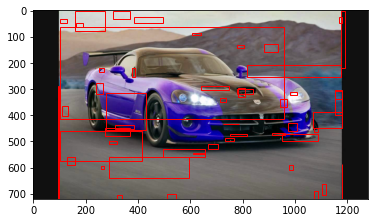

In [32]:
show_rectangles(ex_img, ex_rects[100:150])